In [ ]:
!pip install -U sklearn

# Unsupervised laarning playground

Η άσκηση αυτή δεν έχει ζητούμενο σύνταξης κώδικα. Είναι ένα playground όπου μπορείτε να παίξετε με τις παραμέτρους των συναρτήσεων δημιουργίας τεχνητών datasets [make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html), [make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html), [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html), [make_swiss_roll](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_swiss_roll.html), και [make_s_curve](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_s_curve.html) και βέβαια με τις υπερπαράμετρους των αλγόριθμων συσταδοποίησης [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [HAC](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html), [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html), και Fuzzy $c$-Means.

Ειδικά στην περίπτωση του Fuzzy $c$-Means, για λόγους ομοιομορφίας στον κώδικα, θα χρησιμοποιήσουμε μια custom υλοποίηση, με τις υπερπαραμέτρους που αναφέρονται στο επόμενο κελί. 

In [1]:
# Θα χρησιμοποιήσουμε ένα custom implementation του Fuzzy c-Means
# τεχνική εξήγηση: θέλουμε o fuzzy c-means να έχει μέθοδο fit και ιδιότητα labels_

!git clone https://gist.github.com/0089154dee399b385c28ab24eef7b86c.git
%cd 0089154dee399b385c28ab24eef7b86c
import kmeans
%cd /content/

# Παράμετροι (k, m=2, max_iter=100, random_state=None, tol=1e-4) 
# k: πλήθος clusters. Η παράμετρος αυτή πρέπει να δηλωθεί υποχρεωτικά. Οι υπόλοιπες αν δεν δηλωθούν, λαμβάνουν τις default τιμές. 
# m > 1: fuzzy-ness parameter
#  The closer to m is to 1, the closter to hard kmeans.
#  The bigger m, the fuzzier (converge to the global cluster).
# tol: tolerance value (a small value up to which the difference in values of two consequent updations is accepted).

Cloning into '0089154dee399b385c28ab24eef7b86c'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 15 (delta 4), reused 6 (delta 1), pack-reused 0
Unpacking objects: 100% (15/15), done.
/content/0089154dee399b385c28ab24eef7b86c
/content


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


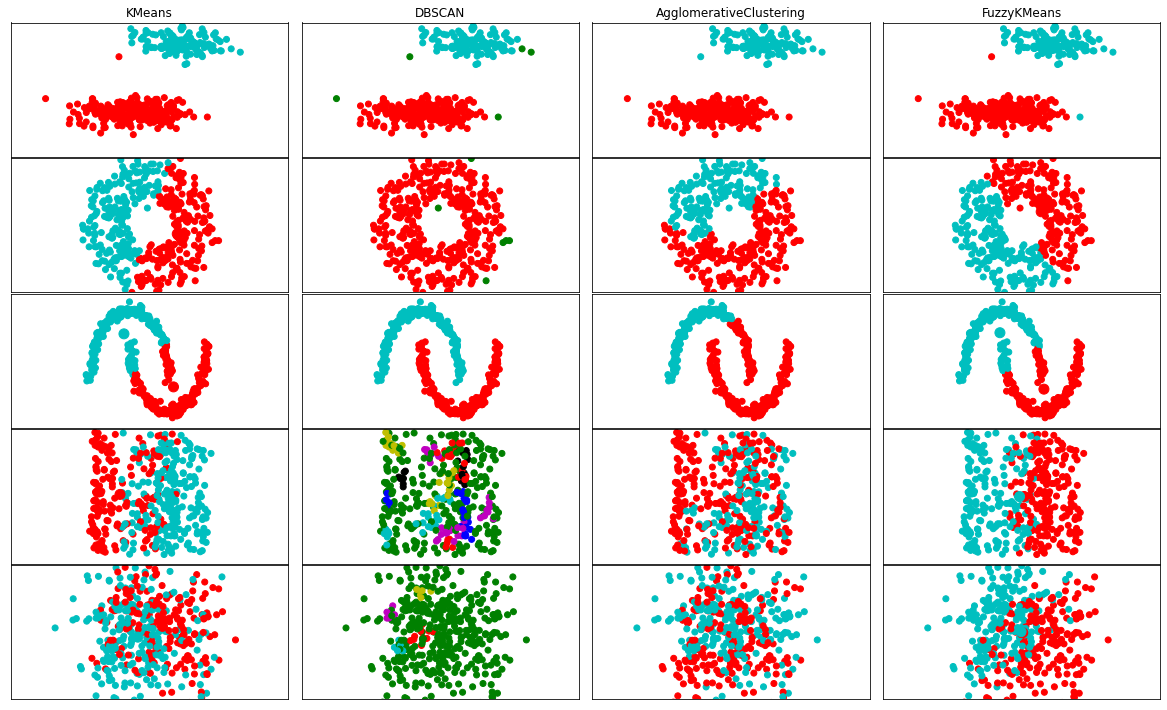

In [2]:
import numpy as np
import pylab as pl

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from kmeans import FuzzyKMeans

from sklearn.datasets import make_circles, make_moons, make_blobs, make_swiss_roll, make_s_curve
from sklearn.preprocessing import StandardScaler


# Generate datasets
n_samples = 400
blobs = make_blobs(n_samples=n_samples, cluster_std=2)
noisy_circles = make_circles(n_samples=n_samples, factor=.6, noise=.1)
noisy_moons = make_moons(n_samples=n_samples, noise=.05)
swiss_roll = make_swiss_roll(n_samples, noise=0.5)
s_curve = make_s_curve(n_samples, noise=0.5)

colors = np.array([x for x in 'rcmykbgrcmykbgrcmykbgrcmykbg'])
colors = np.hstack([colors] * 5)

pl.figure(figsize=(16, 10))
pl.subplots_adjust(left=.001, right=.999, bottom=.01, top=.95, wspace=.05,
        hspace=.01)

plot_num = 1
for i_dataset, dataset in enumerate([blobs, noisy_circles, noisy_moons, swiss_roll, s_curve]):
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    two_means = KMeans(2)
    dbscan = DBSCAN(eps=.3)
    hac = AgglomerativeClustering()
    fuzzy_kmeans = FuzzyKMeans(k=2, m=4)
    
    for algorithm in [two_means, dbscan, hac, fuzzy_kmeans]:
        algorithm.fit(X)
        y_pred = algorithm.labels_.astype(int)

        # plot
        pl.subplot(5, 4, plot_num)
        if i_dataset == 0:
            pl.title(str(algorithm).split('(')[0])
            pl.axis('equal')
        pl.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist())
  

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            pl.axis('equal')
            pl.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
        
        pl.axis('equal')
        pl.xlim(-2, 2)
        pl.ylim(-2, 2)
        pl.xticks(())
        pl.yticks(())
        plot_num += 1

pl.show()